# This notebook analyses PIMA indian diabetic dataset


In [163]:
import pandas as pd
import numpy as np
import pickle
import sklearn

In [164]:
dataset=pd.read_csv('pima-indians-diabetes.csv')

In [165]:
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [166]:
dataset.count()

6        767
148      767
72       767
35       767
0        767
33.6     767
0.627    767
50       767
1        767
dtype: int64

In [167]:
import matplotlib.pyplot as plt

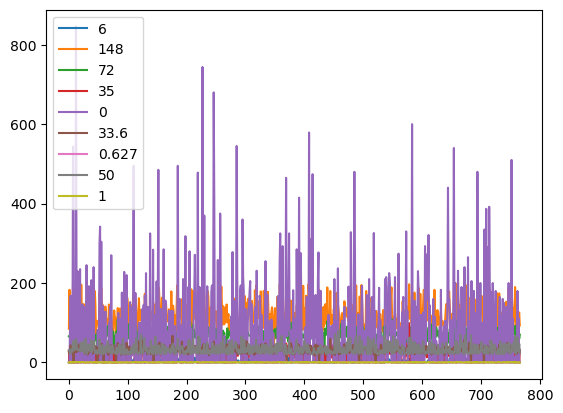

In [168]:
dataset.plot()
plt.show()

<Axes: ylabel='Frequency'>

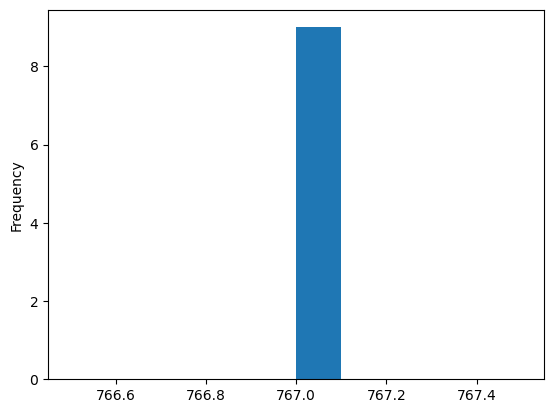

In [169]:
x=dataset.count()

x.plot(kind='hist')

In [170]:
X=dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
Y=dataset.iloc[:,[8]].values


In [171]:
from sklearn.model_selection import train_test_split


In [172]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=100)

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
Ytrain=np.ravel(Ytrain)
classifier=KNeighborsClassifier()
classifier.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [175]:
testdata=np.array([[10,115,0,0,0,35.3,0.134,29]])
pred=classifier.predict( testdata )
print(pred)

[0]


In [176]:
Ypred=classifier.predict(Xtest)

In [177]:
from sklearn.metrics import confusion_matrix

In [178]:
cm = confusion_matrix(Ytest,Ypred)
cm

array([[81, 15],
       [29, 29]], dtype=int64)

In [179]:
sc=classifier.score(Xtest,Ytest)
sc

0.7142857142857143

In [180]:
from sklearn.metrics import classification_report
 
print(classification_report(Ytest, Ypred))


              precision    recall  f1-score   support

           0       0.74      0.84      0.79        96
           1       0.66      0.50      0.57        58

    accuracy                           0.71       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.71      0.71      0.70       154



In [181]:
# import pickle
# file=open('knndiabetic.pkl','wb')
# pickle.dump(classifier,file)
# file.close()

import joblib
joblib.dump(classifier,"knndiabetic.pkl")

['knndiabetic.pkl']

In [182]:
from sklearn.tree import DecisionTreeClassifier

In [183]:
dtobject=DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=3)

In [184]:
dtobject.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [185]:
cm = confusion_matrix(Ytest,Ypred)
cm

array([[81, 15],
       [29, 29]], dtype=int64)

In [186]:
sc=dtobject.score(Xtest,Ytest)
sc

0.7402597402597403

In [187]:
Ypred=dtobject.predict(Xtest)

In [188]:
print(classification_report(Ytest, Ypred))


              precision    recall  f1-score   support

           0       0.77      0.82      0.80        96
           1       0.67      0.60      0.64        58

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.74      0.74       154



In [189]:
# file=open('dtdiabetic.pkl','wb')
# pickle.dump(dtobject,file)
# file.close()

import joblib

joblib.dump(dtobject,"dtdiabetic.pkl")

['dtdiabetic.pkl']